<h1>Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [16]:
import numpy as np
import unittest

def sum_prod(X, V):
    for i in range(len(X)):
        if len(X[i]) != len(V[i]):
            return 'Длины не равны'
    multiply = 0
    sum_multiply = 0
    for i in range(len(X)):
        multiply = np.dot(X[i], V[i])
        sum_multiply += multiply
    return sum_multiply

class TestClass(unittest.TestCase):
    #Тест на обычных случайных матрицах
    def test_sum_prod(self):
        matrix_1 = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8]])
        matrix_2 = np.array([[2, 7, 8], [9, 4, 2], [1, 5, 8]])
        array_matrixes = [matrix_1, matrix_2]

        vector_1 = np.array([1, 2, 3])
        vector_2 = np.array([4, 5, 6])
        array_vectors = [vector_1, vector_2]
        expected_result = np.array([105, 94, 121])
        result = sum_prod(array_matrixes, array_vectors)
        # Специальная функция np.array_equal для сравнения массивов 
        # (через == нельзя сравнивать матрицы из библеотеки numpy)
        self.assertTrue(np.array_equal(result, expected_result))

    #Тест на единичных матрицах
    def test_sum_ones_matrix_equal(self):
        matrix_1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        matrix_2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        array_matrixes = [matrix_1, matrix_2]
        
        vector_1 = np.array([0, 0 , 0])
        vector_2 = np.array([4, 5, 6])
        array_vectors = [vector_1, vector_2]

        expected_result = np.array([4, 5, 6])
        result = sum_prod(array_matrixes, array_vectors)
        self.assertTrue(np.array_equal(result, expected_result))

    def test_when_len_not_coincide(self):
        matrix_1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        matrix_2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        array_matrixes = [matrix_1, matrix_2]
        vector_1 = np.array([0, 0])
        vector_2 = np.array([4, 5])
        array_vectors = [vector_1, vector_2]
        expected_result = 'Длины не равны'
        result = sum_prod(array_matrixes, array_vectors)
        self.assertTrue(np.array_equal(result, expected_result))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода


In [17]:
import numpy as np
import unittest

def binarize(M: np.ndarray, threshold=0.5):
    for i in range(len(M[:, 0])):
        for j in range(len(M[0, :])):
            if M[i, j] > threshold:
                M[i, j] = 1
            else:
                M[i, j] = 0
    return M

class TestBinarize(unittest.TestCase):
    def test_binarize(self):
        matrix_1 = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
        funck = binarize(matrix_1)
        result = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]])
        self.assertTrue(np.array_equal(funck, result))
        
    def test_all_zeros(self):
        matrix_1 = np.zeros((5, 5))
        funck = binarize(matrix_1)
        result = np.zeros((5, 5))
        self.assertTrue(np.array_equal(funck, result))
    
    def test_threshold_6(self):
        matrix_1 = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
        funck = binarize(matrix_1, threshold=6)
        result = np.array([[0, 0, 0], [0, 0, 0], [0, 1, 1], [1, 1, 1]])
        self.assertTrue(np.array_equal(funck, result))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
# Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. 
# Напишите такую же функцию, но для столбцов. Напишите тесты для кода

import numpy as np
import unittest

matrix_1 = np.array([[2, 2, 3], [4, 4, 5], [6, 7, 8], [9, 10, 10]])
matrix_2 = np.array([[2, 7, 8], [9, 4, 2], [1, 5, 8]])
array_matrixes = [matrix_1, matrix_2]

def unique_rows(mat):
    rows_matrix = []
    # Идем по длине матрицы и каждую строку матрицы добавляем в список
    for i in range(len(mat)):
        rows_matrix.append(list(mat[i, :]))

    unique = []
    # Добавляем в список unique уникальные числа из строк матрицы
    for i in range(len(rows_matrix)):
        unique.append(list(set(rows_matrix[i])))

    # Теперь выводим уникальные числа в строке
    for i in range(len(unique)):
        print('Уникальные числа в ' + str(i) +' строке: ' + ' '.join(map(str, unique[i])))

def unique_columns(mat):
    columns_matrix = []
    # Идем по длине матрицы и каждый столбец матрицы добавляем в список
    for i in range(len(mat[0, :])):
        columns_matrix.append(list(mat[:, i]))

    unique = []
    # Добавляем в список unique уникальные числа из столбцов матрицы
    for i in range(len(columns_matrix)):
        unique.append(list(set(columns_matrix[i])))

    # Теперь выводим уникальные числа в столбце
    for i in range(len(unique)):
        print('Уникальные числа в ' + str(i) +' столбце: ' + ' '.join(map(str, unique[i])))
    

unique_rows(matrix_1)
unique_columns(matrix_1)

Уникальные числа в 0 строке: 2 3
Уникальные числа в 1 строке: 4 5
Уникальные числа в 2 строке: 8 6 7
Уникальные числа в 3 строке: 9 10
Уникальные числа в 0 столбце: 9 2 4 6
Уникальные числа в 1 столбце: 2 10 4 7
Уникальные числа в 2 столбце: 8 10 3 5


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

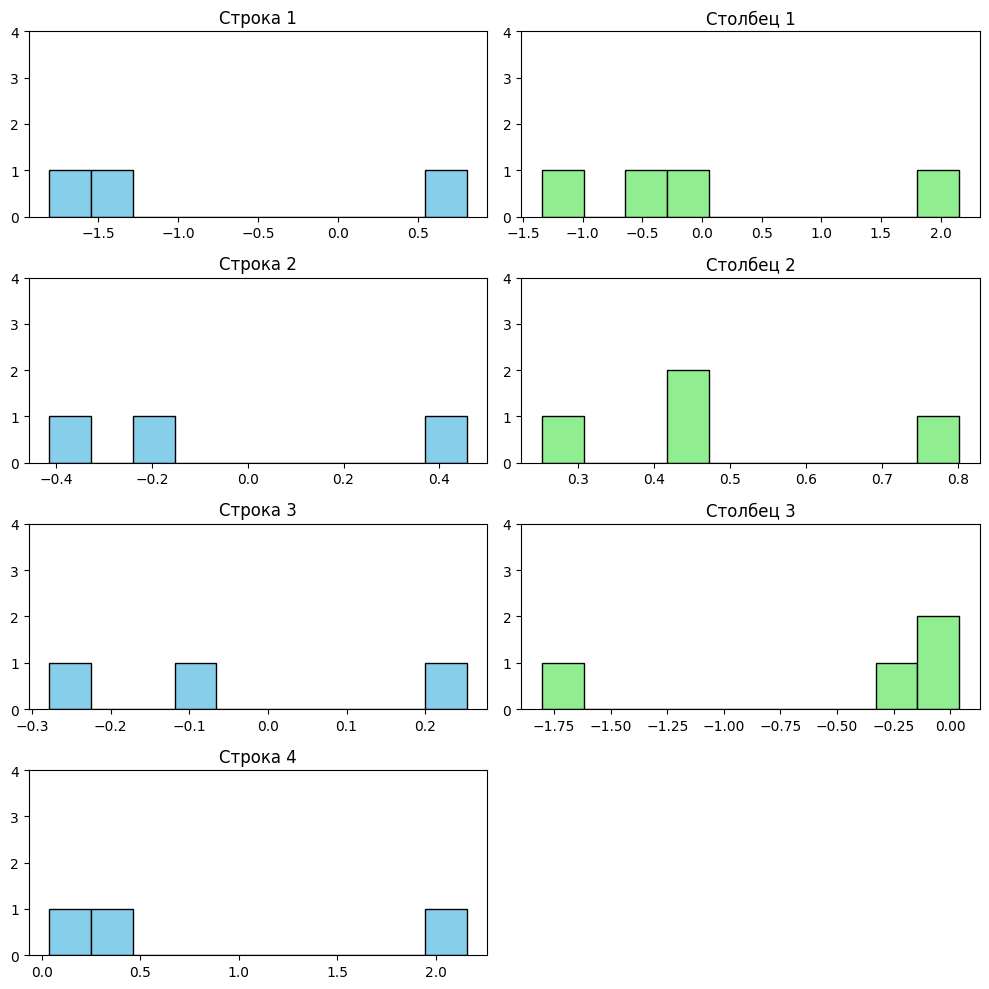

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#Функция для создания матрицы и заполнения случайными числами по нормальному закону, где 
#mu - среднее значение, sigma - стандартное отклонение
def create_matrix_with_normalvariate(m, n, mu=0, sigma=1):
    matrix = np.random.normal(mu, sigma, (m, n))
    return matrix

def count_mat_waiting(matrix):
    #подсчет мат. ожидания для строк матрицы и внесение их в список
    mat_for_string = [float(np.mean(matrix[:, i])) for i in range(len(matrix[0, :]))]
    #подсчет мат. ожидания для столбцов матрицы и внесение их в список
    mat_for_columns = [float(np.mean(matrix[i, :])) for i in range(len(matrix[:, 0]))]
    return mat_for_string, mat_for_columns

def count_mat_dispersed(matrix):
    #подсчет дисперсии для строк матрицы и внесение их в список
    mat_for_string = [float(np.var(matrix[:, i])) for i in range(len(matrix[0, :]))]
    #подсчет дисперсии для столбцов матрицы и внесение их в список
    mat_for_columns = [float(np.var(matrix[i, :])) for i in range(len(matrix[:, 0]))]
    return mat_for_string, mat_for_columns

def plot_histograms(matrix):
    rows, cols = matrix.shape
    
    # Построение гистограмм для строк
    plt.figure(figsize=(10, 10))
    for i in range(rows):
        plt.subplot(rows, 2, 2*i+1) 
        plt.hist(matrix[i, :], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Строка {i+1}')
        plt.ylim(0, 4)
    # Построение гистограмм для столбцов
    for j in range(cols):
        plt.subplot(rows, 2, 2*(j)+2)
        plt.hist(matrix[:, j], bins=10, color='lightgreen', edgecolor='black')
        plt.title(f'Столбец {j+1}')
        plt.ylim(0, 4)
    plt.tight_layout()
    plt.show()

matrix = create_matrix_with_normalvariate(4, 3)

plot_histograms(matrix)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
import numpy as np
import unittest

def chess(m: int, n: int, a=1, b=0):
    #Создаем матрицу из единиц размером m на n
    matrix_with_ones = np.ones((m, n))
    #Идем по длине столбца
    for i in range(len(matrix_with_ones[:, 0])):
        #Идем по длине строки
        for j in range(len(matrix_with_ones[0, :])):
            #Проверка на четность ширины матрицы
            if len(matrix_with_ones[0,:]) % 2 == 0:
                #Проверка условия по индексам матрицы
                if i % 2 == 0 and j % 2 == 0: 
                    matrix_with_ones[i, j] = a
                elif i % 2 == 0 and j % 2 != 0:
                    matrix_with_ones[i, j] = b
                elif i % 2 != 0 and j % 2 == 0:
                    matrix_with_ones[i, j] = b
                else:
                    matrix_with_ones[i, j] = a
            else:
                if i % 2 == 0 and j % 2 == 0:
                    matrix_with_ones[i, j] = b
                elif i % 2 == 0 and j % 2!= 0:
                    matrix_with_ones[i, j] = a
                elif i % 2!= 0 and j % 2 == 0:
                    matrix_with_ones[i, j] = a
                else:
                    matrix_with_ones[i, j] = b

    return matrix_with_ones

class TestClass(unittest.TestCase):
    #Тест для квадратной матрицы
    def test_chess_width_chet(self):
        self.assertTrue(np.array_equal(chess(3, 3), np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])))
        self.assertTrue(np.array_equal(chess(3, 3, 0, 2), np.array([[2, 0, 2], [0, 2, 0], [2, 0, 2]])))
        self.assertTrue(np.array_equal(chess(3, 3, 2, 0), np.array([[0, 2, 0], [2, 0, 2], [0, 2, 0]])))
        self.assertTrue(np.array_equal(chess(3, 3, 0, 0), np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])))
    
    #Тест для квадратной матрицы с четными и нечетными размерами
    def test_chess_width_nechet(self):
        self.assertTrue(np.array_equal(chess(3, 4), np.array([[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]])))
        self.assertTrue(np.array_equal(chess(4, 3, 0, 2), np.array([[2, 0, 2], [0, 2, 0], [2, 0, 2], [0, 2, 0]])))
        self.assertTrue(np.array_equal(chess(3, 4, 2, 0), np.array([[2, 0, 2, 0], [0, 2, 0, 2], [2, 0, 2, 0]])))
        

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

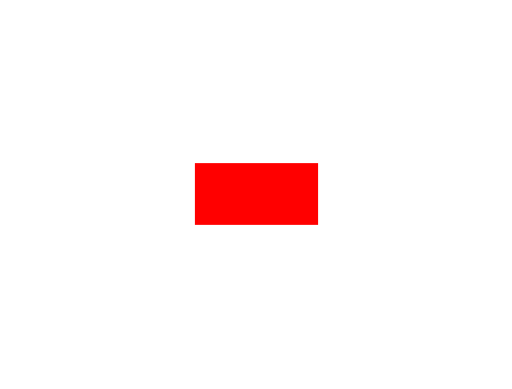

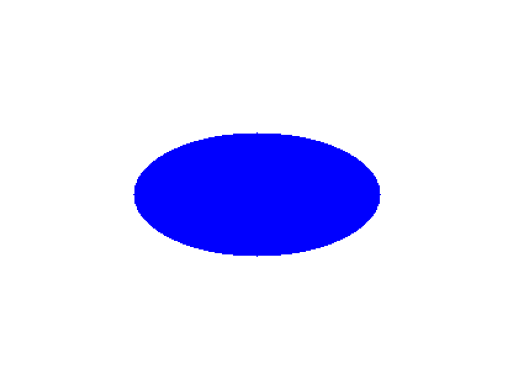

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с фоновым цветом
    image = np.ones((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color  # Задаем фоновый цвет

    # Рассчитаем координаты для прямоугольника
    x0 = (n - a) // 2  # Начальная точка по x
    y0 = (m - b) // 2  # Начальная точка по y

    # Рисуем прямоугольник
    image[y0:y0 + b, x0:x0 + a] = rectangle_color

    # Отображаем изображение
    plt.imshow(image)
    plt.axis('off')  # Отключаем оси
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с фоновым цветом
    image = np.ones((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color  # Задаем фоновый цвет

    # Координаты центра эллипса
    x0 = n // 2
    y0 = m // 2

    # создание сетки координат
    y, x = np.ogrid[:m, :n]
    
    # Уравнение эллипса
    mask = ((x - x0)**2 / a**2 + (y - y0)**2 / b**2) <= 1

    # Применяем цвет эллипса
    image[mask] = ellipse_color

    # Отображаем изображение
    plt.imshow(image)
    plt.axis('off')  # Отключаем оси
    plt.show()

if __name__ == "__main__":
    draw_rectangle(100, 50, 300, 400, rectangle_color=(255, 0, 0), background_color=(255, 255, 255))
    draw_ellipse(100, 50, 300, 400, ellipse_color=(0, 0, 255), background_color=(255, 255, 255))


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [19]:
import numpy as np

def calc_statistics(time_series):
    # Вычисление математического ожидания, дисперсии и СКО
    # с помощью библиотек numpy
    mean = np.mean(time_series) #мат ожидание
    variance = np.var(time_series) #дисперсия
    std_dev = np.std(time_series) #СКО
    
    return mean, variance, std_dev

def find_local_extrema(time_series):
    local_max = []
    local_min = []
    
    for i in range(1, len(time_series) - 1):
        # Проверка на локальные максимумы и минимумы
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_max.append(i)
        if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_min.append(i)
    
    return local_max, local_min

# Вычисление скользящего среднего с помощью функции с библиотеки numpy
def moving_average(time_series, p):
    smoothed_series = np.convolve(time_series, np.ones(p)/p, mode='valid')
    return smoothed_series

# Тестовые данные
time_series = [1, 3, 7, 1, 2, 6, 0, 1, 5, 3, 2, 8]

# Вычисление математического ожидания, дисперсии и СКО
mean, variance, std_dev = calc_statistics(time_series)
print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"СКО: {std_dev}")

# Нахождение локальных максимумов и минимумов
local_max, local_min = find_local_extrema(time_series)
print(f"Локальные максимумы (индексы): {local_max}")
print(f"Локальные минимумы (индексы): {local_min}")

p = 8
smoothed_series = moving_average(time_series, p)
print(f"Скользящее среднее (p={p}): {smoothed_series}")

Математическое ожидание: 3.25
Дисперсия: 6.354166666666667
СКО: 2.520747243709029
Локальные максимумы (индексы): [2, 5, 8]
Локальные минимумы (индексы): [3, 6, 10]
Скользящее среднее (p=8): [2.625 3.125 3.125 2.5   3.375]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [20]:
import numpy as np

def one_hot_encoding(labels):
    # Находим количество уникальных классов (максимальное значение + 1)
    num_classes = np.max(labels) + 1
    
    # Создаем двумерный массив с нулями и заполняем его one-hot представлением
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    
    # Проставляем 1 в соответствующих позициях
    for idx, label in enumerate(labels):
        one_hot[idx, label] = 1
    
    return one_hot

labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)
print("One-hot encoding:\n", one_hot_encoded)

One-hot encoding:
 [[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
